Ingrese la velocidad de la moto (m/s): 15
Ingrese la aceleración del policía (m/s²): 3

El tiempo de encuentro es: 10.00 segundos


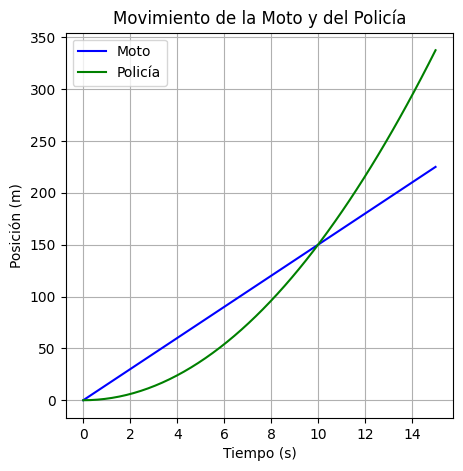

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vm = float(input("Ingrese la velocidad de la moto (m/s): "))
ap = float(input("Ingrese la aceleración del policía (m/s²): "))

t_encuentro = (2 * vm) / ap

print(f"\nEl tiempo de encuentro es: {t_encuentro:.2f} segundos")

t = np.linspace(0, t_encuentro + 5, 50)
xf_moto = vm * t
xf_policia = 0.5 * ap * t**2

plt.figure(figsize=(5,5))
plt.plot(t, xf_moto, label='Moto', color='blue')
plt.plot(t, xf_policia, label='Policía', color='green')

plt.title("Movimiento de la Moto y del Policía")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid()
plt.show()

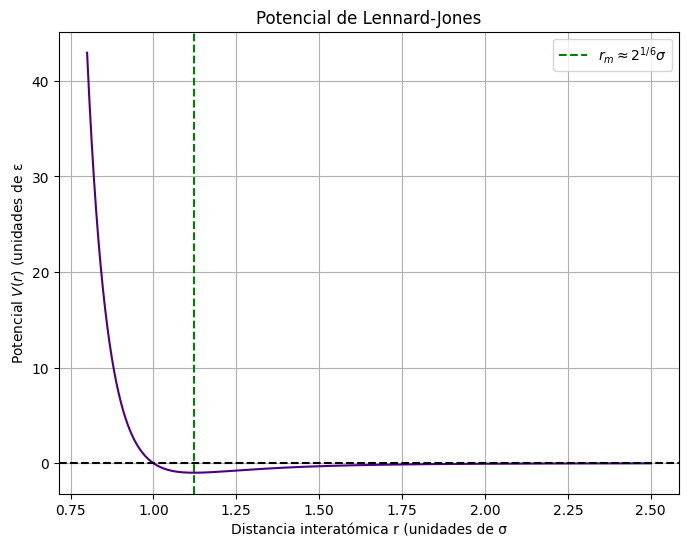


La distancia de equilibrio rm es aproximadamente: 1.1225 σ
Para σ = 0.8, la distancia de equilibrio rm ≈ 0.8980
Para σ = 1.0, la distancia de equilibrio rm ≈ 1.1225
Para σ = 1.2, la distancia de equilibrio rm ≈ 1.3470
Para σ = 1.5, la distancia de equilibrio rm ≈ 1.6837


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones(r, epsilon, sigma):

    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

sigma = 1
epsilon = 1
rc = 2.5 * sigma

r = np.linspace(0.8 * sigma, rc, 500)


V = lennard_jones(r, epsilon, sigma)

plt.figure(figsize=(8,6))
plt.plot(r, V, color='indigo')
plt.title("Potencial de Lennard-Jones")
plt.xlabel("Distancia interatómica r (unidades de σ")
plt.ylabel("Potencial $V(r)$ (unidades de ε")
plt.grid()
plt.axhline(0, color='black', linestyle='--')
plt.axvline(2**(1/6)*sigma, color='green', linestyle='--', label=r'$r_m \approx 2^{1/6}\sigma$')
plt.legend()
plt.show()

r_min = 2**(1/6) * sigma
print(f"\nLa distancia de equilibrio rm es aproximadamente: {r_min:.4f} σ")

sigmas = [0.8, 1.0, 1.2, 1.5]

for sigma_i in sigmas:
    r_min_i = 2**(1/6) * sigma_i
    print(f"Para σ = {sigma_i}, la distancia de equilibrio rm ≈ {r_min_i:.4f}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country                            196 non-null    object
 1   Average Height, Boys, 19 yo (cm)↓  196 non-null    int64 
 2   Girls 19 (cm)                      196 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Paises               196 non-null    object
 1   Alturas_hombres(cm)  196 non-null    int64 
 2   alturas_mujeres(cm)  196 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


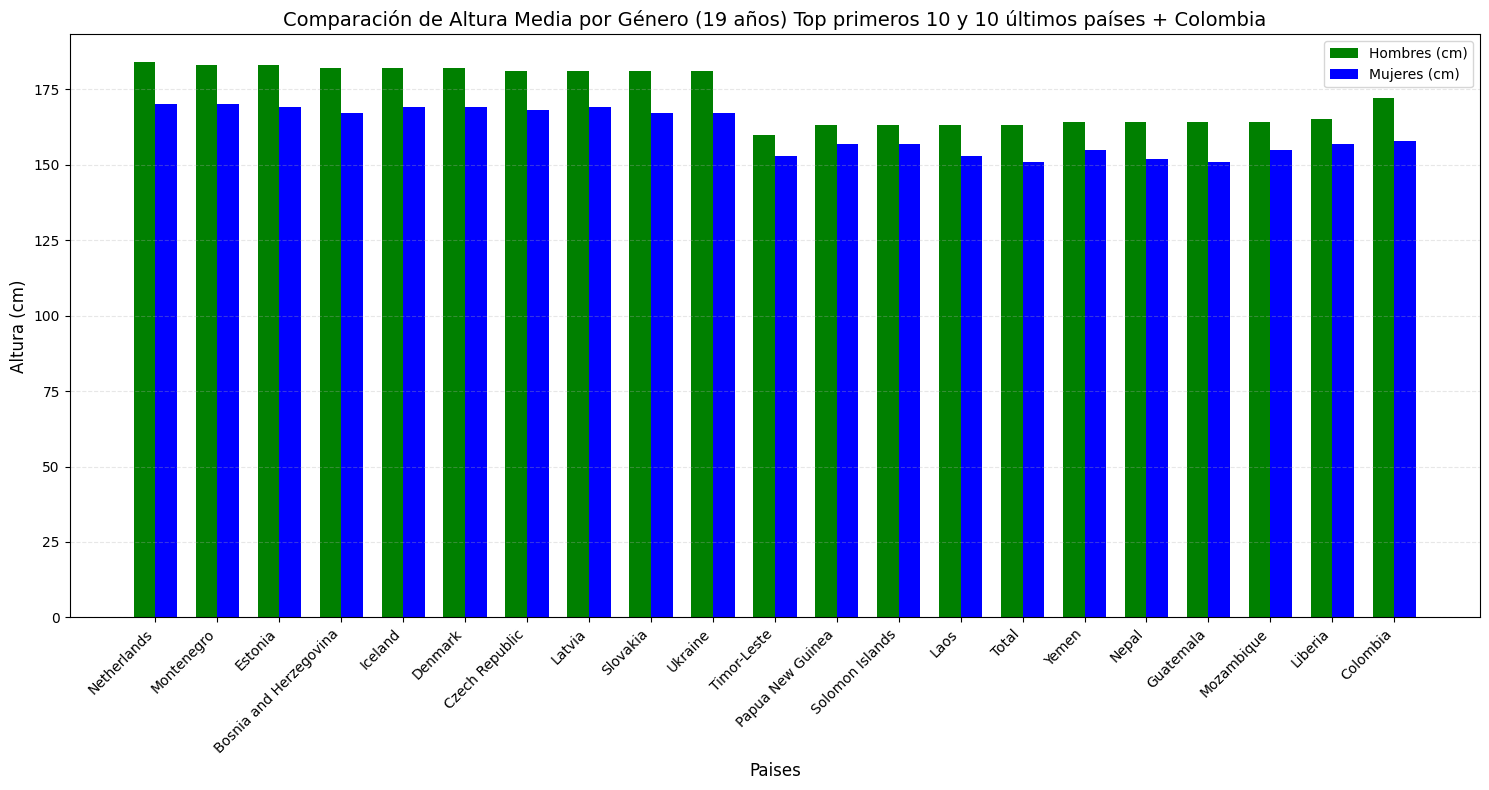

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url2 = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
income = pd.read_html(url2)
# a)
income = income[0]
alturas = alturas.drop(columns= ['Unnamed: 0', 'Girls 19 (in)','Boys 19 (in)',])
alturas.info()
alturas.columns = ['Paises', 'Alturas_hombres(cm)', 'alturas_mujeres(cm)']
alturas.info()
# b)
top_10 = alturas.nlargest(10, 'Alturas_hombres(cm)')
bottom_10 = alturas.nsmallest(10, 'Alturas_hombres(cm)')
colombia = alturas[alturas['Paises'] == 'Colombia']

comparacion = pd.concat([top_10, bottom_10, colombia])

# Creación del gráfico
plt.figure(figsize=(15, 8))
bar_width = 0.35
index = range(len(comparacion))

plt.bar(index, comparacion['Alturas_hombres(cm)'], bar_width, label='Hombres (cm)', color='green')
plt.bar([i + bar_width for i in index], comparacion['alturas_mujeres(cm)'], bar_width, label='Mujeres (cm)', color='blue')

plt.xlabel('Paises', fontsize=12)
plt.ylabel('Altura (cm)', fontsize=12)
plt.title('Comparación de Altura Media por Género (19 años) Top primeros 10 y 10 últimos países + Colombia', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], comparacion['Paises'], rotation = 45, ha= 'right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
